In [1]:
#分类，即逻辑回归分类，其本质是Linear线性函数（wx+b）与一个sigmoid函数的结合。
#同时，由于sigmoid用MSE来做loss function不是凸函数，因此用了log形式的CrossEntropyLoss

In [1]:
import torch
import torch.nn.functional as F     # 激励函数都在这
import torch.nn as nn
from torch.autograd import Variable   #torch.autograd.Variable（）将张量转换为计算图中的节点

import matplotlib.pyplot as plt

In [2]:
#数据（产生两类数据）：
n_data = torch.ones(100, 2)         # 数据的基本形态
x0 = torch.normal(2*n_data,1)  # 类型0 x data (tensor), shape=(100, 2)，torch.normal（）建立均值为1的tensor，第二个1表示标准差为1 （默认）  
y0 = torch.zeros(100)               # 类型0 y data (tensor), shape=(100, )
x1 = torch.normal(-2*n_data, 1)     # 类型1 x data (tensor), shape=(100, 1)
y1 = torch.ones(100)                # 类型1 y data (tensor), shape=(100, )

#数据合并
x = torch.cat((x0, x1), 0).type(torch.FloatTensor)  # FloatTensor = 32-bit floating,0表示沿着第1个轴合并，原来都是100*2现在变成了200*2
y = torch.cat((y0, y1), 0).type(torch.LongTensor)    # LongTensor = 64-bit integer 
                                    #因为要使用cross_entropy，要求x_batch是float类型，y_batch是long类型

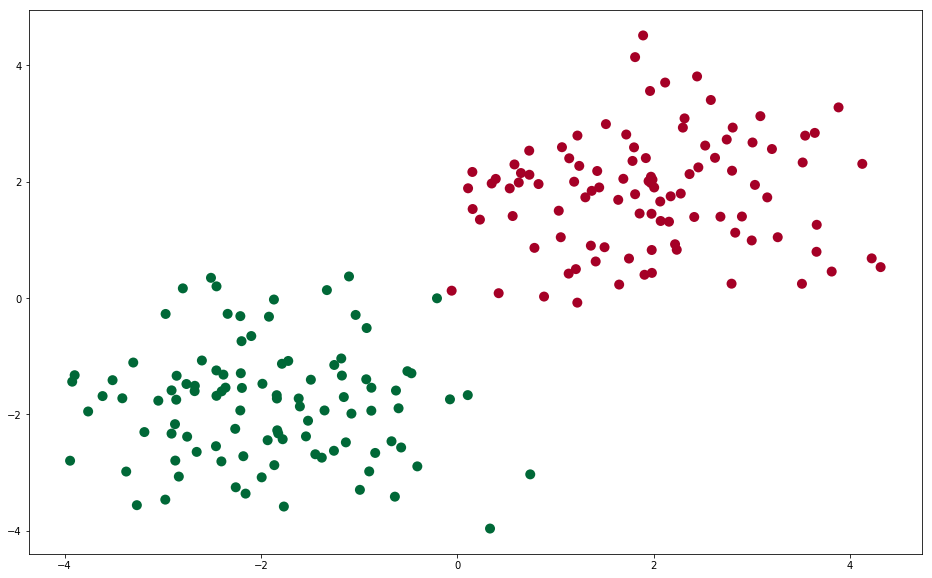

In [3]:
#显示数据
plt.figure(figsize=(16,10))
plt.scatter(x.data.numpy()[:,0],x.data.numpy()[:,1],c=y,s=100,lw=0,cmap='RdYlGn')         #size=100,line width=0,cmap着色

In [52]:
#定义一个简单的NN，来做classification 
class Network(nn.Module):
    def __init__(self,n_features,n_hidden,n_output):
        super(Network,self).__init__()         #表示nerwork的__init__继承了nn.Module的__init__
        self.hidden = nn.Linear(in_features=n_features,out_features=n_hidden)
        self.out = nn.Linear(in_features=n_hidden,out_features=n_output)
    
    def forward(self,x):
        x = F.relu(self.hidden(x))
        x = self.out(x)                              #由于是，不需要再对结果激励，也不用多处理，只需要输出即可
        return x

In [92]:
network=Network(2,10,2)             #这个时候输入有2个了，输出是0（[1，0]）或者1（[0，1]），也是两个
print(network)

Network(
  (hidden): Linear(in_features=2, out_features=10, bias=True)
  (out): Linear(in_features=10, out_features=2, bias=True)
)


D:\anaconda\envs\py37\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


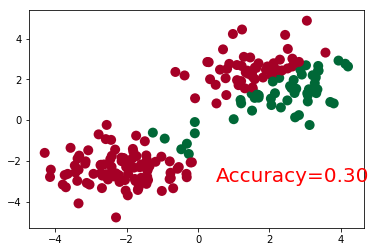

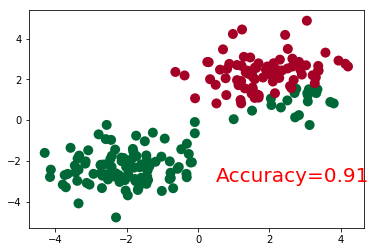

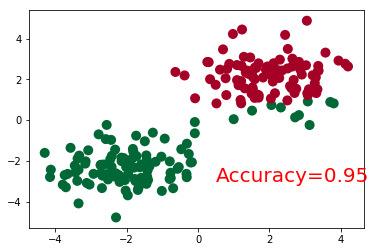

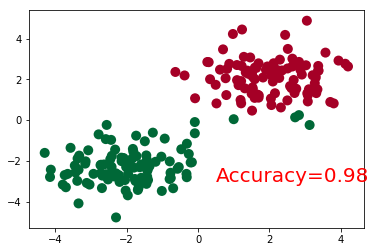

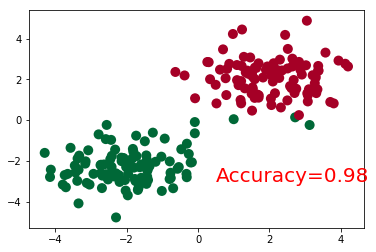

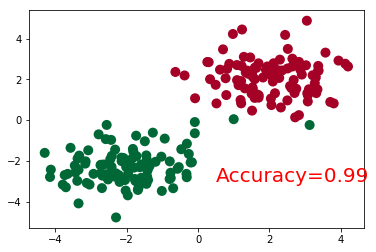

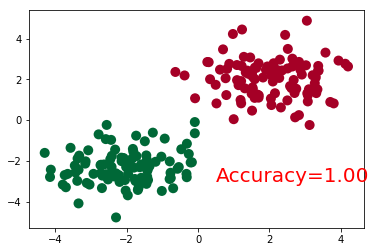

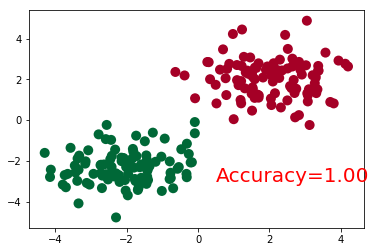

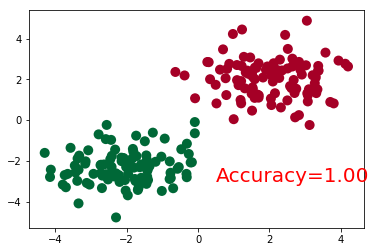

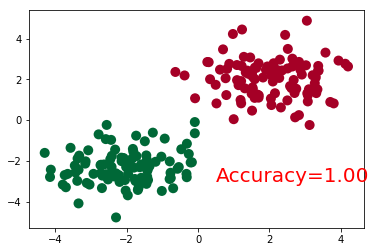

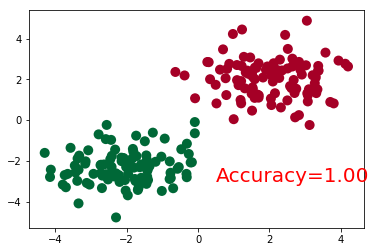

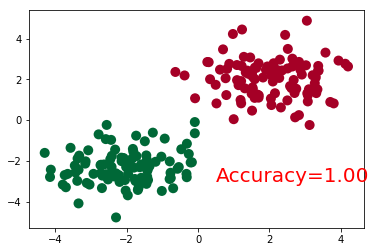

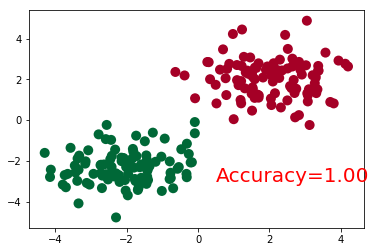

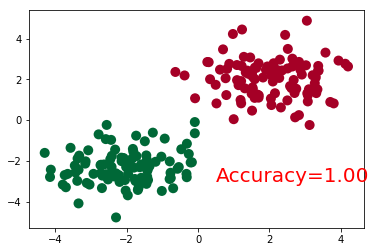

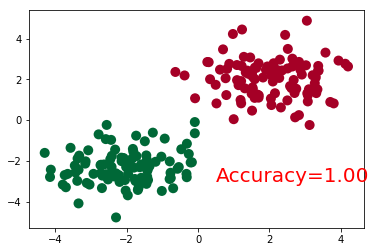

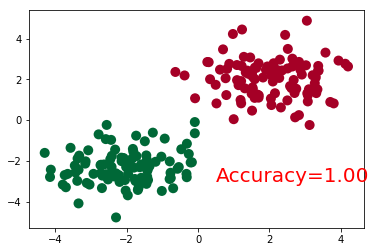

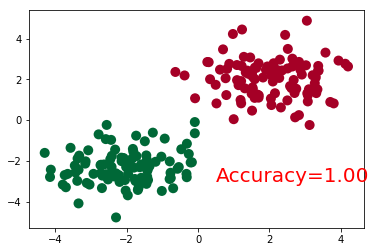

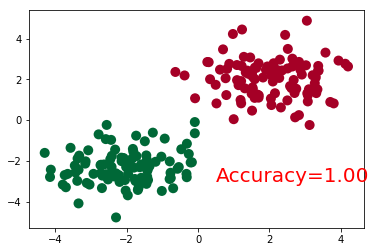

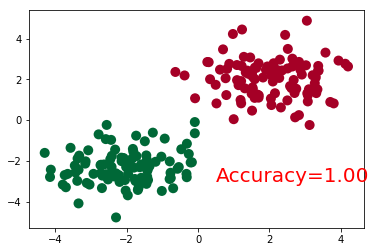

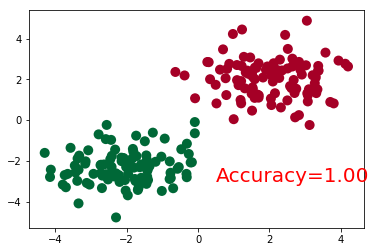

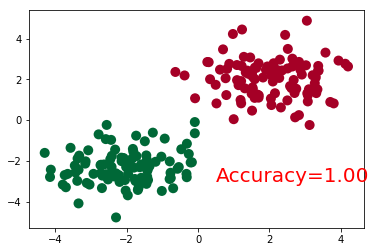

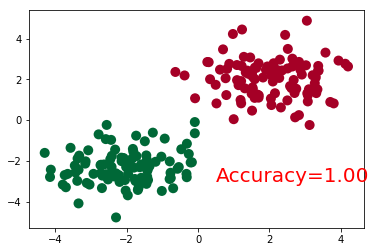

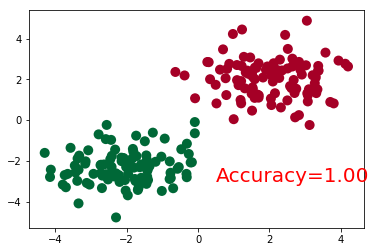

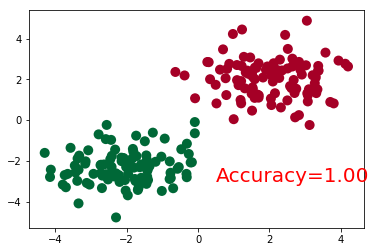

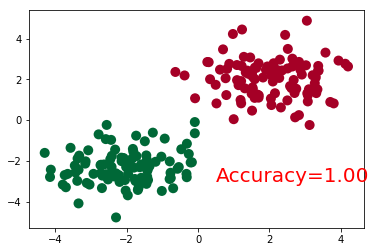

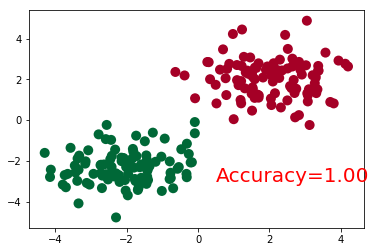

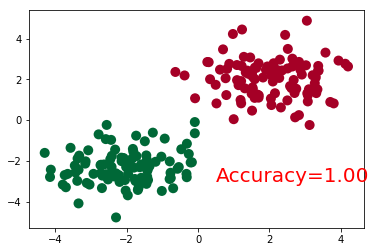

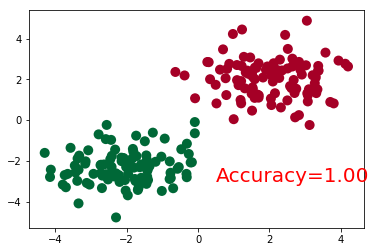

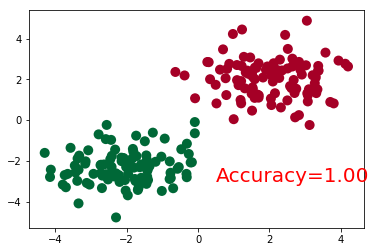

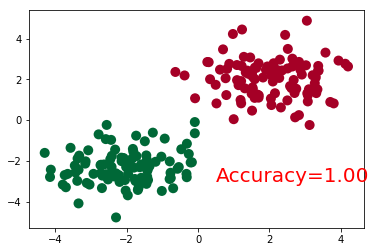

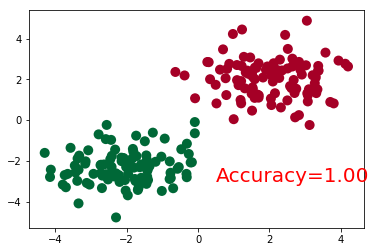

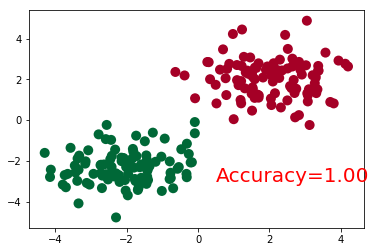

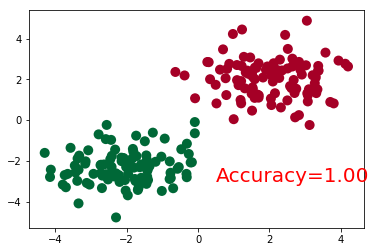

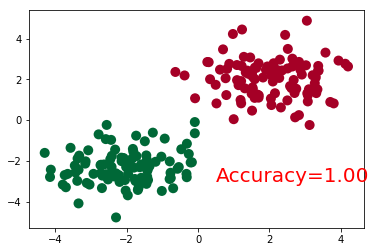

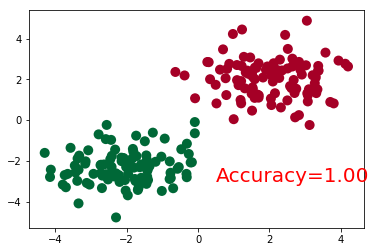

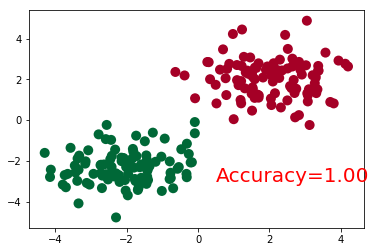

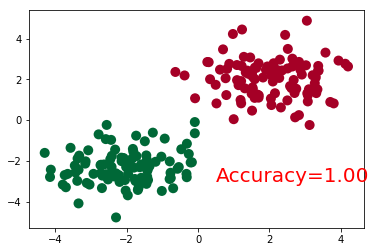

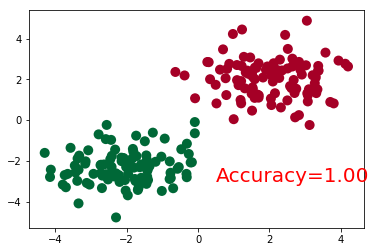

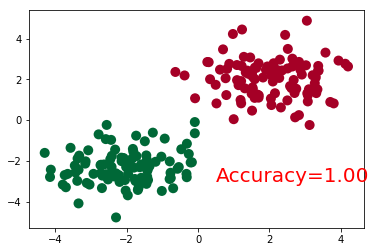

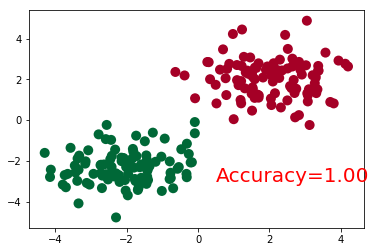

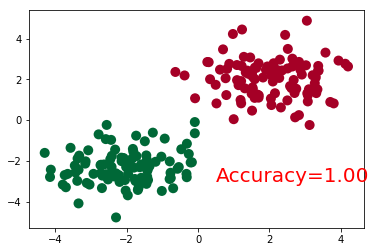

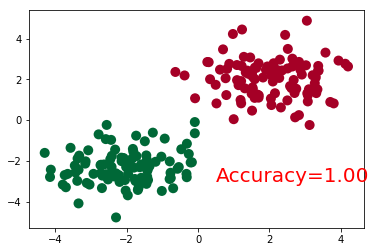

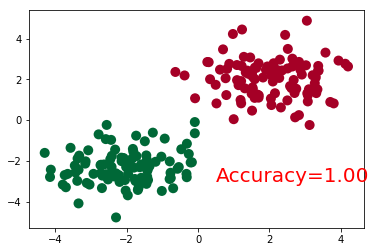

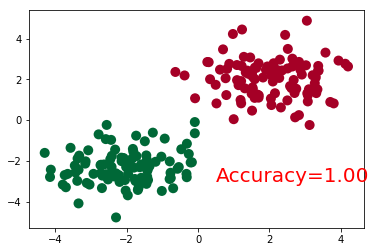

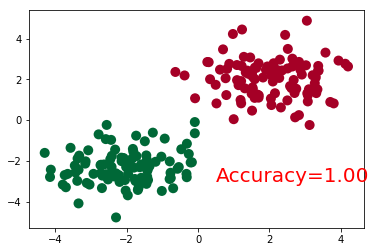

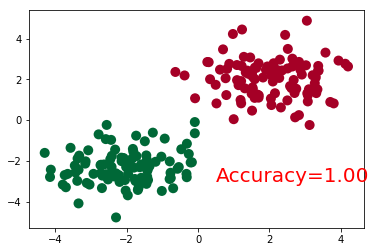

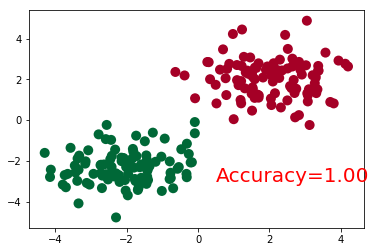

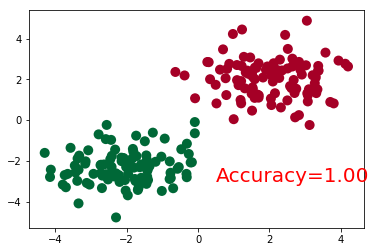

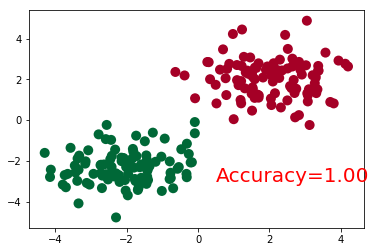

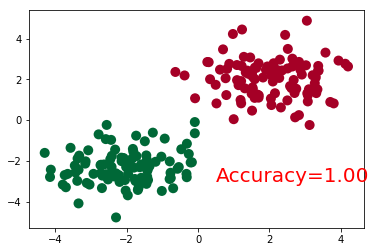

In [93]:
#训练模型：
optimizer=torch.optim.SGD(network.parameters(),lr=0.02)        #这个简单的问题lr=0.5即可
loss_func=nn.CrossEntropyLoss()                 #用CrossEntropyLoss来定义loss，多用于逻辑回归，并且最后自带了softmax
                                            #比如，最后输出结果为[0.2,0.8]，表示是第1/2个标签的概率分别为0.2/0.8

plt.ion()              #开启图像交互过程，可以显示动态图像，在notebook里面显示不出来，在其他编译器如pycharm可以
plt.show()

for i in range(100):               #把100个数据看做1个batches，然后总共处理100次
    out=network(x)         #out的dim为100*2,这个时候out还是如[1.231,-0.203]的任意值形式，需要softmax来概率化，变成pred
    loss=loss_func(out,y)
    
    optimizer.zero_grad()          #每次都要对这个NN网里的grad清零，以至于上一个batch不影响下一个batch，每次都单独考虑一个batch
                                   #因为pytorch中的grad都是默认累加的。 当然也可以用累加到一定量再清零的办法
    loss.backward()
    optimizer.step()
    
    if i%2 ==0:             #每2个数据显示一个图像
        # plot and show learning process
        plt.cla()             #clear axe，清除当前图片内容，但是不删掉图片，可以继续操作该图片，
                            #还有一些清除操作如plt.clf()清除当前图片及内容,plt.close()清除窗户
        pred=torch.max(F.softmax(out),1)[1] 
        # torch.max(,1)表示沿着第二个轴做max操作，原dim是200*2，第二个轴上的两个数比较，dim最后变为200*1
        # 同时torch.max返回两类数，第一类是其值，第二类是其indice，这里需要indice
        pred_y=pred.data.numpy().squeeze()       
        target_y=y.data.numpy()
        plt.scatter(x.data.numpy()[:,0],x.data.numpy()[:,1],c=pred_y,s=100,lw=0,cmap='RdYlGn')
        accuracy=sum(target_y==pred_y)/200;
        plt.text(0.5, -3, 'Accuracy=%.2f' % accuracy, fontdict={'size': 20, 'color':  'red'})  # 0.5,0表示文本的显示坐标
        plt.pause(0.1)      #显示下次图像时要等待0.1s
    

plt.ioff()
plt.show()